In [203]:
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt

In [204]:
# from google.colab import files

# uploaded = files.upload()

### 1.

In [205]:
def single_leg_contrast_stretching(img, r1, s1, r2, s2):
  if (0 <= img and img <= r1):
      return (s1 / r1)*img
  elif (r1 < img and img <= r2):
      return ((s2 - s1)/(r2 - r1)) * (img - r1) + s1
  else:
      return ((255 - s2)/(255 - r2)) * (img - r2) + s2

In [206]:
# def plot(r1, s1, r2, s2):
#   x = np.array([r1, s1, r2, s2])
#   y = np.array([0, 0, 255, 255])  
#   plt.plot(x, y)
#   plt.show()
def plot(r1, s1, r2, s2):
  x = np.array([0,r1,r2,255])
  y = np.array([0,s1,s2,255])
  xx = np.vstack([x[[0,1]], x[[1,2]], x[[2,3]]])
  yy = np.vstack([y[[0,1]], y[[1,2]], y[[2,3]]])
  plt.plot(xx,yy, '-ok', mfc='C1', mec='C1')

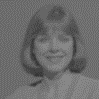

In [207]:
img1_1 = cv.imread("img1_1.png", 0)
cv2_imshow(img1_1)

In [208]:
pixelVal_vec = np.vectorize(single_leg_contrast_stretching)

Contrast stretching, the image is becoming a bit lighter


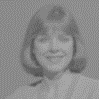

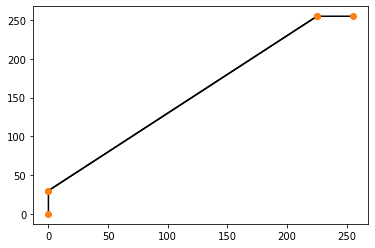

In [209]:
img1_1_contrast = pixelVal_vec(img1_1, 0, 30, 225, 255)
print("Contrast stretching, the image is becoming a bit lighter")
plot(0, 30, 225, 255)
cv2_imshow(img1_1_contrast)

Image is getting dark


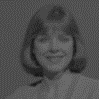

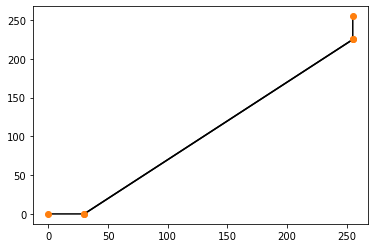

In [210]:
img1_1_contrast = pixelVal_vec(img1_1, 30, 0, 255, 225)
print("Image is getting dark")
plot(30, 0, 255, 225)
cv2_imshow(img1_1_contrast)

Contrast stretching


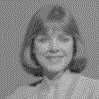

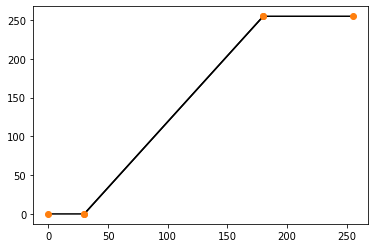

In [211]:
img1_1_contrast = pixelVal_vec(img1_1, 30, 0, 180, 255)
print("Contrast stretching")
plot(30, 0, 180, 255)
cv2_imshow(img1_1_contrast)

Image is getting converted to binary


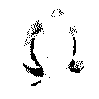

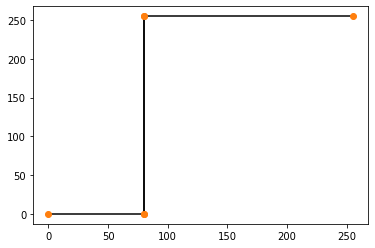

In [212]:
img1_1_contrast = pixelVal_vec(img1_1, 80, 0, 80, 255)
print("Image is getting converted to binary")
plot(80, 0, 80, 255)
cv2_imshow(img1_1_contrast)

Image is getting inverted


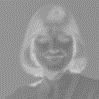

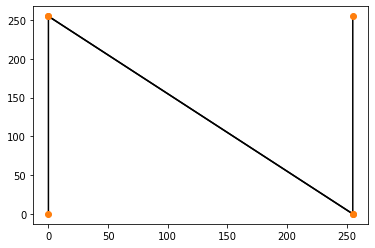

In [213]:
img1_1_contrast = pixelVal_vec(img1_1, 0, 255, 255, 0)
print("Image is getting inverted")
plot(0, 255, 255, 0)
cv2_imshow(img1_1_contrast)

All pixel values are being converted to 80


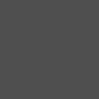

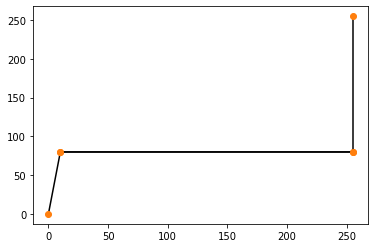

In [214]:
img1_1_contrast = pixelVal_vec(img1_1, 10, 80, 255, 80)
print("All pixel values are being converted to 80")
plot(10, 80, 255, 80)
cv2_imshow(img1_1_contrast)

### 2.

In [215]:
def two_leg_contrast_stretching(img, r1, s1, r2, s2, r3, s3):
  if (0 < img and img <= r1):
      return (s1 / r1)*img
  elif (r1 < img and img <= r2):
      return ((s2 - s1)/(r2 - r1)) * (img - r1) + s1
  elif ((r2 < img and img <= r3) or (r3==255 and s3 == 255)):
      return ((s3 - s2)/(r3 - r2)) * (img - r2) + s2
  else:
      return ((255 - s3)/(255 - r3)) * (img - r3) + s3

In [216]:
def plot_two_leg(r1, s1, r2, s2, r3, s3):
  x = np.array([0,r1,r2,r3,255])
  y = np.array([0,s1,s2,s3,255])
  xx = np.vstack([x[[0,1]], x[[1,2]], x[[2,3]], x[[3,4]]])
  yy = np.vstack([y[[0,1]], y[[1,2]], y[[2,3]], y[[3,4]]])
  plt.plot(xx,yy, '-ok', mfc='C1', mec='C1')

In [217]:
pixelVal_vec = np.vectorize(two_leg_contrast_stretching)

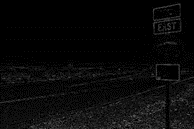

In [218]:
street = cv.imread("street.png", 0)
cv2_imshow(street)

Image is getting brighter


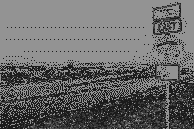

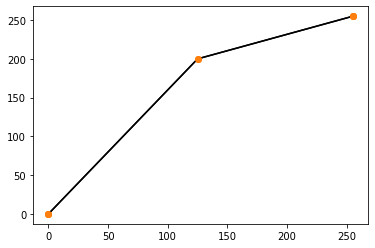

In [219]:
street_contrast = pixelVal_vec(street, 0, 0, 125, 200, 255, 255)
print("Image is getting brighter")
plot_two_leg(0, 0, 125, 200, 255, 255)
cv2_imshow(street_contrast)

Image is getting brighter


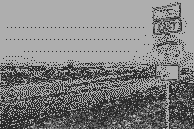

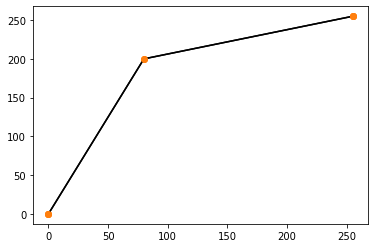

In [220]:
street_contrast = pixelVal_vec(street, 0, 0, 80, 200, 255, 255)
print("Image is getting brighter")
plot_two_leg(0, 0, 80, 200, 255, 255)
cv2_imshow(street_contrast)

### 3.

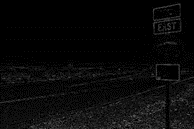

In [221]:
street = cv.imread("street.png", cv.IMREAD_GRAYSCALE)
cv2_imshow(street)

In [222]:
def log_transformation(img):
  c = 255/(np.log(1 + np.max(img)))
  log_transformed = c * np.log(1 + img)
  log_transformed = np.array(log_transformed, dtype = np.uint8)
  cv2_imshow(log_transformed)

Image is getting clearer/brighter


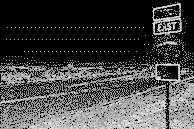

In [223]:
print("Image is getting clearer/brighter")
log_transformation(street)

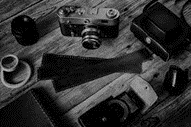

In [224]:
camera = cv.imread("camera.png", cv.IMREAD_GRAYSCALE)
cv2_imshow(camera)

Image is getting clearer/brighter


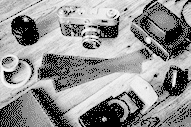

In [225]:
print("Image is getting clearer/brighter")
log_transformation(camera)

### 4.

In [226]:
def two_leg_contrast_stretching(img, r1, s1, r2, s2, r3, s3):
  if (0 < img and img <= r1):
      return (s1 / r1)*img
  elif (r1 < img and img <= r2):
      return ((s2 - s1)/(r2 - r1)) * (img - r1) + s1
  elif ((r2 < img and img <= r3) or (r3==255 and s3 == 255)):
      return ((s3 - s2)/(r3 - r2)) * (img - r2) + s2
  else:
      return ((255 - s3)/(255 - r3)) * (img - r3) + s3

In [227]:
pixelVal_vec = np.vectorize(two_leg_contrast_stretching)

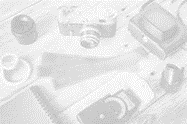

In [228]:
img5_1 = cv.imread("img5_1.png", cv.IMREAD_GRAYSCALE)
cv2_imshow(img5_1)

Image is getting clear/dark


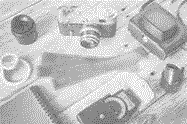

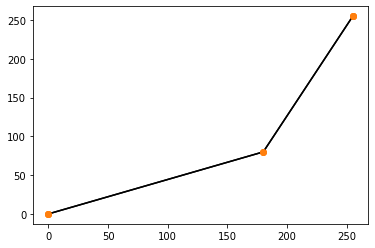

In [229]:
img5_1_contrast = pixelVal_vec(img5_1, 0, 0, 180, 80, 255, 255)
print("Image is getting clear/dark")
plot_two_leg(0, 0, 180, 80, 255, 255)
cv2_imshow(img5_1_contrast)

Contrast stretching


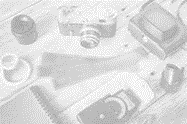

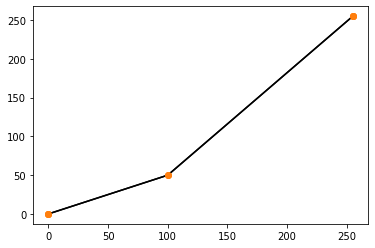

In [230]:
img5_1_contrast = pixelVal_vec(img5_1, 0, 0, 100, 50, 255, 255)
print("Contrast stretching")
plot_two_leg(0, 0, 100, 50, 255, 255)
cv2_imshow(img5_1_contrast)

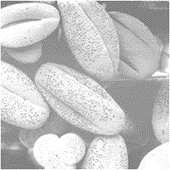

In [231]:
img5_2 = cv.imread("img5_2.png", cv.IMREAD_GRAYSCALE)
cv2_imshow(img5_2)

Image is getting clear/dark


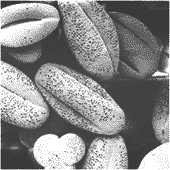

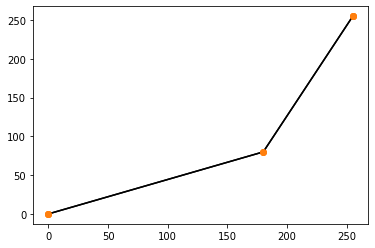

In [232]:
img5_1_contrast = pixelVal_vec(img5_2, 0, 0, 180, 80, 255, 255)
print("Image is getting clear/dark")
plot_two_leg(0, 0, 180, 80, 255, 255)
cv2_imshow(img5_1_contrast)

Contrast stretching


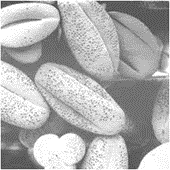

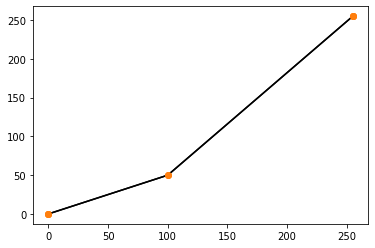

In [233]:
img5_1_contrast = pixelVal_vec(img5_2, 0, 0, 100, 50, 255, 255)
print("Contrast stretching")
plot_two_leg(0, 0, 100, 50, 255, 255)
cv2_imshow(img5_1_contrast)